In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/refs/heads/master/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
16,47,25000,1
195,34,43000,0
254,50,44000,0
203,41,71000,0
315,39,75000,1


## Train test split

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                              df['Purchased'],
                                              test_size=0.3,
                                              random_state=0)
x_train.shape,x_test.shape

((280, 2), (120, 2))

## StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

# fit the scaler to the train set, it will learn the parameter
scaler.fit(x_train)

# transform train and test set
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
x_train # this is pandas data frame

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
x_train_scaled  # but this is numpy array

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

* we can give data feame but it can giev 2d array

In [12]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [13]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scalling')

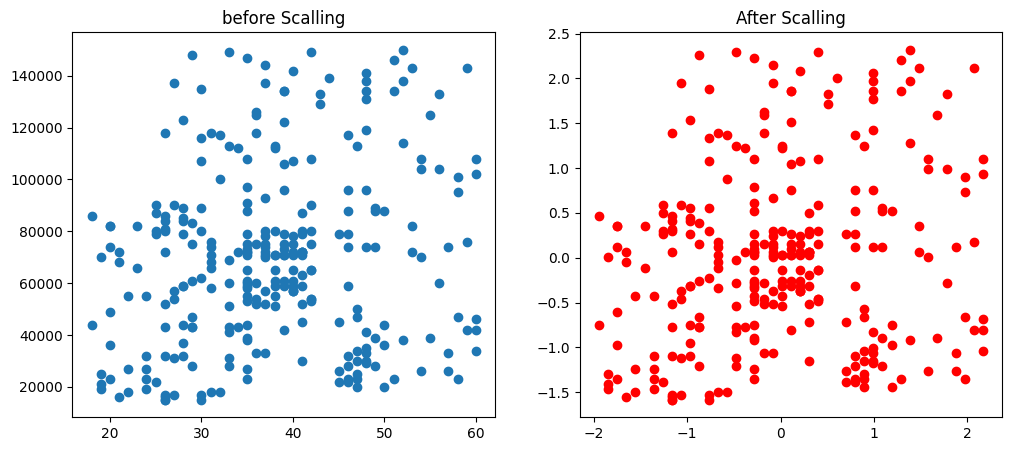

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('before Scalling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scalling')

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

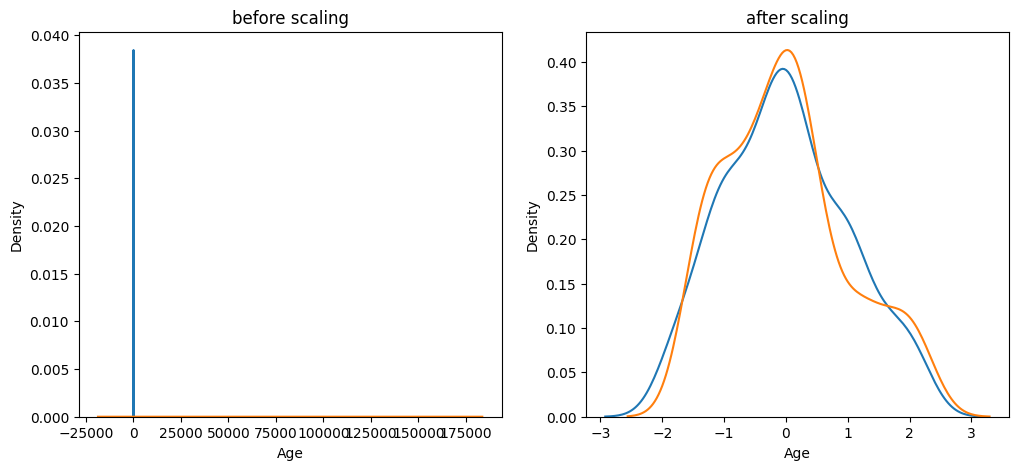

In [17]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
# before scaling 
ax1.set_title('before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# after scalind
ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

## Comparision of Distribution

<Axes: title={'center': 'age distribution before scaling'}, xlabel='Age', ylabel='Density'>

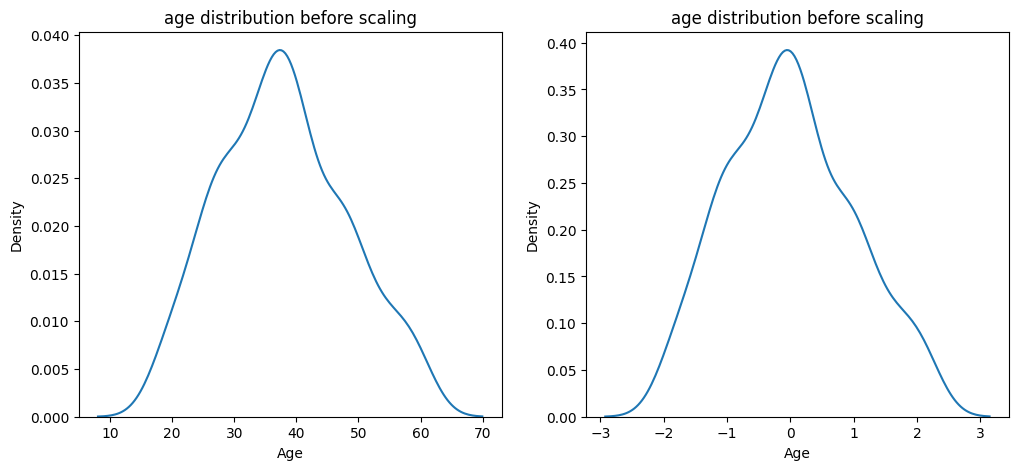

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title('age distribution before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)

# after scaling
ax2.set_title('age distribution before scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

<Axes: title={'center': 'age distribution before scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

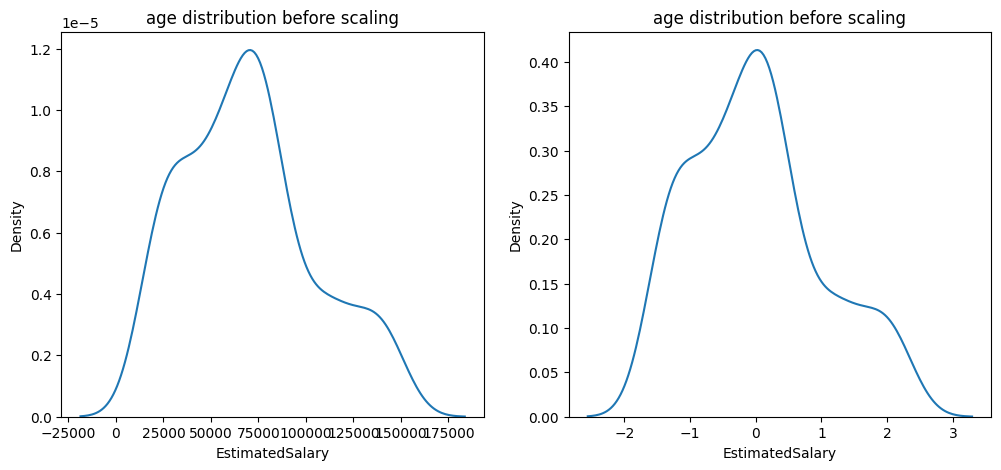

In [19]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title('age distribution before scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('age distribution before scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

## why scaling important ?

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [22]:
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print ('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
